# Predicting the Concrete Compressive Strength 

In [1]:
# Importing the required basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Concrete Compressive Strength.csv", low_memory=False)

In [3]:
len(df.columns), len(df)

(9, 1030)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [6]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [7]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
# Features
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
# Checking for missing values
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [10]:
duplicated_values = df.duplicated()
duplicated_values.head()


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [11]:
if duplicated_values.all() == 'True':
    print("Duplicated values are present")
else:
    print("No duplicated values")

No duplicated values


Text(0, 0.5, 'Concrete compressive strength')

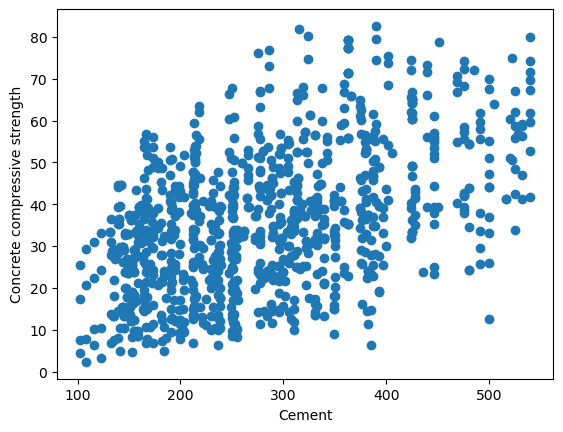

In [12]:
# Visualize
fig, ax = plt.subplots()
plt.scatter(df["Cement (component 1)(kg in a m^3 mixture)"], df["Concrete compressive strength(MPa, megapascals) "])
plt.xlabel("Cement")
plt.ylabel("Concrete compressive strength")

<AxesSubplot:ylabel='Frequency'>

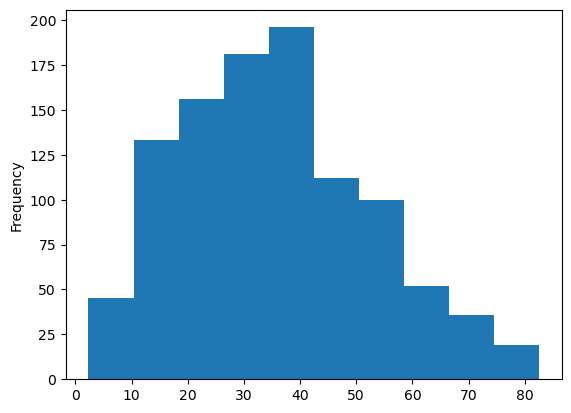

In [13]:
# As the cement quantity increases, the concrete strength also increases as per the scatterplot above.
# Looking at the distibution of concrete strength to look how they behave and what are the likely values.
df["Concrete compressive strength(MPa, megapascals) "].plot.hist()

Text(0, 0.5, 'Concrete compressive strength')

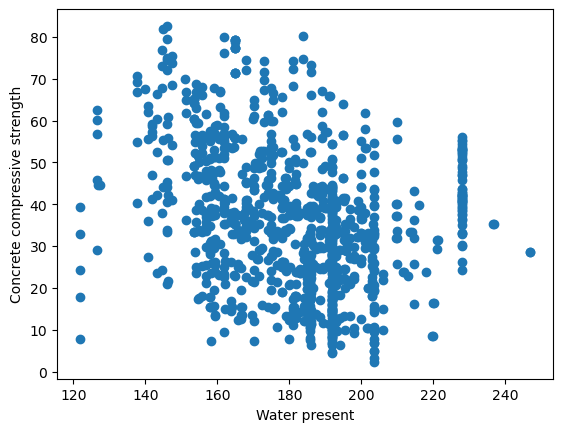

In [14]:
plt.scatter(df["Water  (component 4)(kg in a m^3 mixture)"], df["Concrete compressive strength(MPa, megapascals) "])
plt.xlabel("Water present")
plt.ylabel("Concrete compressive strength")

Text(0, 0.5, 'Concrete compressive strength')

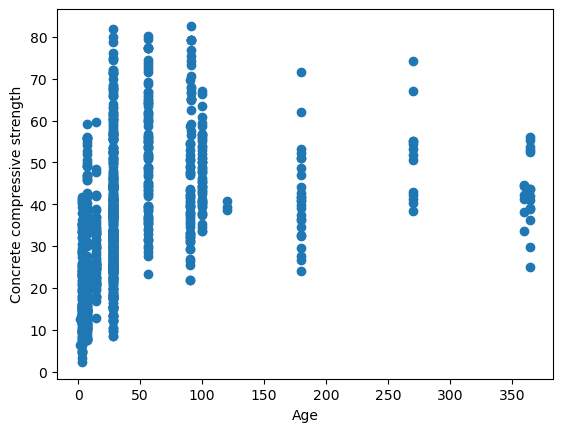

In [15]:
# The relationship is not clear but we can deduce that as the water content increases, the strength decreases.
plt.scatter(df["Age (day)"], df["Concrete compressive strength(MPa, megapascals) "])
plt.xlabel("Age")
plt.ylabel("Concrete compressive strength")

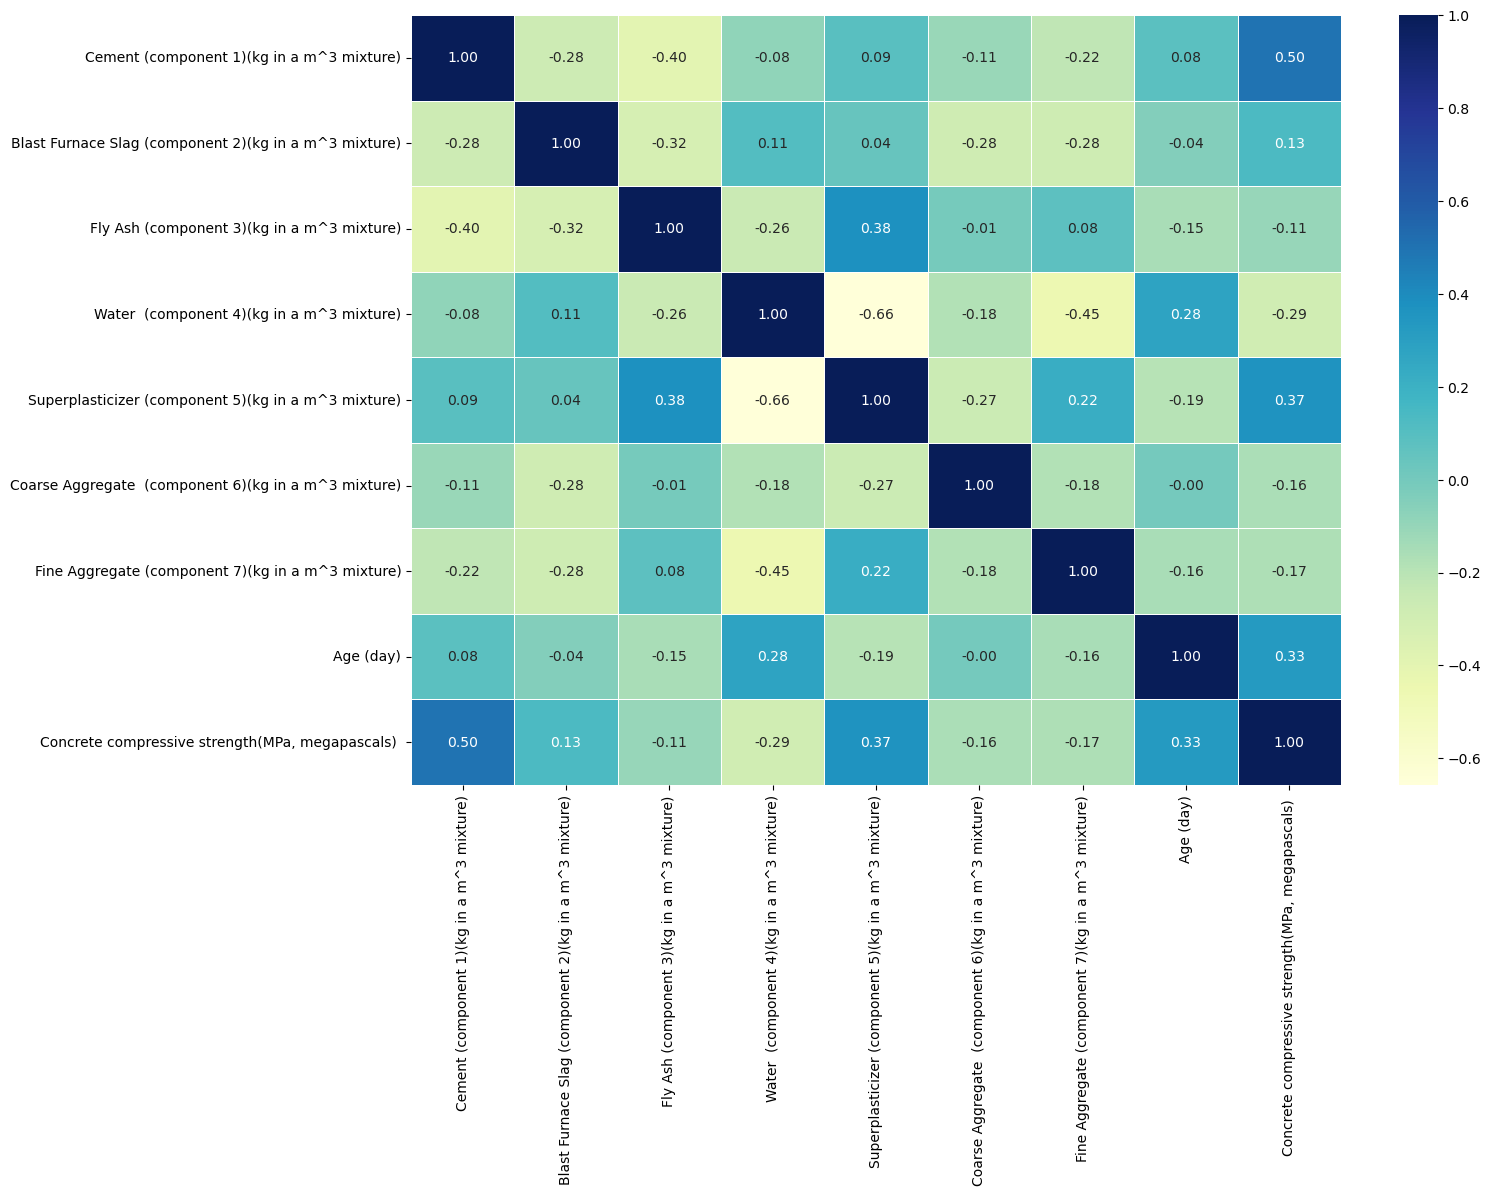

In [16]:
correl = df.corr()
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correl, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

### Modelling

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

model = RandomForestRegressor(n_estimators=100)

X = df.drop("Concrete compressive strength(MPa, megapascals) ", axis=1)
y = df["Concrete compressive strength(MPa, megapascals) "]

In [18]:
X.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [19]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [20]:
model.fit(X, y)

RandomForestRegressor()

In [21]:
model.score(X, y)

0.9875672194828753

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8676841164879399

In [23]:
from sklearn.svm import SVR

In [24]:
models = {"Random Forest Regressor": RandomForestRegressor(random_state=42),
          "Decision trees": DecisionTreeRegressor(random_state=42),
          "Support Vector Machines": SVR(),
          "Ridge Regressor": Ridge(random_state=42)}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    
    np.random.seed(42)
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        model_score[name] = model.score(X_test, y_test)
    
    return model_score

In [25]:
fit_and_score(models=models, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

{'Random Forest Regressor': 0.8675095014734244,
 'Decision trees': 0.782072133147179,
 'Support Vector Machines': 0.20148598569692444,
 'Ridge Regressor': 0.4923842614081718}

In [26]:
# Random forest algorithm gives the best results because of which it is selected

In [27]:
# Choose Randomforestregressor
np.random.seed(42)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.8675095014734244

### Hyperparameter tuning

In [28]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
np.random.seed(42)
rf_grid = {"n_estimators": np.arange(10, 1000, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_samples": [None],
           "max_features": [0.5, 1, "sqrt", "auto"]}

rf_model = RandomizedSearchCV(RandomForestRegressor(), param_distributions=rf_grid, cv=5, verbose=True, n_iter=50, error_score='raise')
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100...
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650

In [29]:
rf_model.best_params_

{'n_estimators': 770,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_samples': None,
 'max_features': 0.5,
 'max_depth': None}

In [30]:
rf_model.score(X_test, y_test)

0.8247064981059058

In [31]:
rf_grid = {"n_estimators": np.arange(10, 1000, 20),
           "max_depth": [None, 3, 5],
           "min_samples_split": np.arange(2, 20, 5),
           "min_samples_leaf": np.arange(1, 20, 5),
           "max_samples": [500],
           "max_features": [1, "auto"]}

rf_gs_model = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=30), param_grid=rf_grid, cv=3, verbose=True)
rf_gs_model.fit(X_train, y_train)
rf_gs_model.score(X_test, y_test)

Fitting 3 folds for each of 4800 candidates, totalling 14400 fits


0.8588542591224462

In [32]:
rf_gs_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 500,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 70}

In [33]:
np.random.seed(42)
ideal_model = RandomForestRegressor(n_estimators=70, min_samples_leaf=1, min_samples_split=2, max_samples=500, max_features='auto')
ideal_model.fit(X_train, y_train)
ideal_model.score(X_test, y_test)

0.856850616742339

In [34]:
# make predictions
y_preds = ideal_model.predict(X_test)

In [35]:
y_preds[:10]

array([26.09977065, 26.63896902, 15.16494582, 12.73828579, 21.31452016,
       34.29891934, 42.13307069, 38.34736481, 38.5460521 , 32.47551141])

In [36]:
df_preds = pd.DataFrame()
df_preds["Orig Compressive Strength"] = y_test
df_preds["Predicted"] = y_preds
df_preds

,Orig Compressive Strength,Predicted
423,29.750889,26.099771
548,25.573354,26.638969
731,15.871738,15.164946
588,7.995853,12.738286
831,16.499161,21.314520
...,...,...
1020,42.140084,43.314951
346,40.148187,37.233733
2,40.269535,40.748957
494,56.337084,57.050284


In [37]:
df_preds.sort_values(by=["Predicted"], ascending=False, inplace=True)

In [38]:
df_preds

,Orig Compressive Strength,Predicted
136,74.497882,70.017667
174,75.497622,69.932003
756,74.166933,69.821265
168,70.698869,67.845100
139,63.397318,66.818538
...,...,...
713,9.694722,10.406347
718,10.354551,9.722549
617,9.307926,9.478735
716,10.089792,9.326473


In [39]:
error = (abs((y_preds - y_test))/y_preds)*100
error

423     13.989084
548      4.000210
731      4.660694
588     37.229755
831     22.591921
          ...    
1020     2.712382
346      7.827457
2        1.176526
494      1.250125
732     49.342404
Name: Concrete compressive strength(MPa, megapascals) , Length: 206, dtype: float64

In [40]:
df_preds["Error in percentage"] = error
df_preds

,Orig Compressive Strength,Predicted,Error in percentage
136,74.497882,70.017667,6.398692
174,75.497622,69.932003,7.958615
756,74.166933,69.821265,6.223990
168,70.698869,67.845100,4.206301
139,63.397318,66.818538,5.120165
...,...,...,...
713,9.694722,10.406347,6.838375
718,10.354551,9.722549,6.500372
617,9.307926,9.478735,1.802018
716,10.089792,9.326473,8.184433


In [41]:
df_preds.to_csv("Comp_Strength_Preds.csv", index=False)

In [42]:
# Feature importances
ideal_model.feature_importances_

array([0.33410503, 0.07619228, 0.01921424, 0.09938858, 0.06952771,
       0.02798261, 0.03501381, 0.33857574])

In [43]:
def plot_features(columns, importances, n=20):
    df_plot = pd.DataFrame({"Features": columns,
                            "Feature importances": importances})
    df_plot = df_plot.sort_values(by="Feature importances", ascending=False)
    df_plot = df_plot.reset_index(drop=True)
    
    # Plot
    fig, ax = plt.subplots()
    ax.barh(df_plot["Features"][:n], df_plot["Feature importances"][:n])
    ax.set_xlabel("Feature importances")
    ax.set_ylabel("Features")
    ax.invert_yaxis()

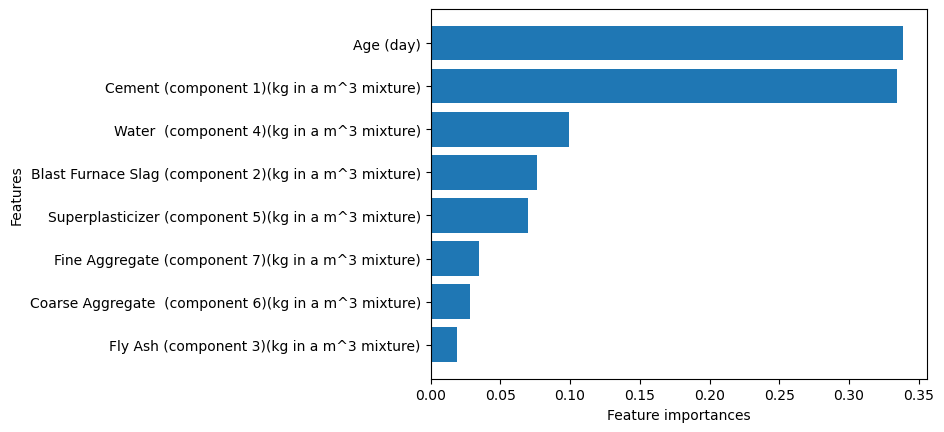

In [44]:
plot_features(X_train.columns, ideal_model.feature_importances_)